## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

In [1]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to /home/biraj/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
def lower_order(text):
  """
  This function converts all the text in input text to lower order.
  Input Args:
  token_text : input text.
  Returns:
  small_order_text : text converted to small/lower order.
  """
  small_order_text = text.lower()
  return small_order_text

# Test:
sample_text = "This Is some Normalized TEXT"
sample_small = lower_order(sample_text)
print(sample_small)

this is some normalized text


In [3]:
import re
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

In [4]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [5]:
def removeunwanted_characters(document):
  """
  This function will remove all the unwanted characters from the input dataset.
  Input Args:
  documet: A text data to be cleaned.
  Return:
  A cleaned document.
  """
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to /home/biraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

def remove_stopwords(text_tokens):
  """
  This function removes all the stopwords present in out text tokens.
  Input Args:
  text_tokens: tokenize input of our datasets.
  Returns:
  result_tokens: list of token without stopword.
  """

  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

In [8]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
  """
  This function performs the lemmatization operations as explained above.
  Input Args:
  token_text: list of tokens.
  Returns:
  lemmatized_tokens: list of lemmatized tokens.
  """
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/biraj/nltk_data...


[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/biraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
from nltk.stem import PorterStemmer

def stemming(text):
  """
  This function performs stemming operations.
  Input Args:
  token_text: list of tokenize text.
  Returns:
  stemm_tokes: list of stemmed tokens.
  """
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens

# Build a Text Cleaning Pipeline

In [10]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  # Convert the input to small/lower order.
  data = lower_order(dataset)
  # Remove URLs
  data = remove_urls(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data = removeunwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens =  remove_stopwords(tokens)
  if rule == "lemmatize":
    tokens =  lemmatization(tokens)
  elif rule == "stem":
    tokens =  stemming(tokens)
  else:
    print("Pick between lemmatize or stem")


  return " ".join(tokens)

# Text Classification using Machine Learning Models


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


## Step 1: Loading the Dataset

Let's load the Trump tweet sentiment analysis dataset and explore its structure.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./trum_tweet_sentiment_analysis.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Check column names and data types
print("\nColumn information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check the distribution of sentiment labels
if 'label' in df.columns:
    print("\nSentiment label distribution:")
    print(df['label'].value_counts())

Dataset shape: (1850123, 2)

First 5 rows:


,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850123 entries, 0 to 1850122
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   text       object
 1   Sentiment  int64 
dtypes: int64(1), object(1)
memory usage: 28.2+ MB
None

Missing values:
text         0
Sentiment    0
dtype: int64


## Step 2: Text Cleaning and Tokenization

Now let's apply the preprocessing pipeline to clean the text data.

In [14]:
# Apply the text cleaning pipeline to the text column
print("Applying text preprocessing pipeline...")

# Check if text column exists and preprocess it
if 'text' in df.columns:
    # Using the text_cleaning_pipeline function we already defined
    # Apply lemmatization for better semantic meaning preservation
    df['cleaned_text'] = df['text'].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))
else:
    # If 'text' column doesn't exist, try to find a similar column name
    text_columns = [col for col in df.columns if 'text' in col.lower() or 'tweet' in col.lower()]
    if text_columns:
        df['cleaned_text'] = df[text_columns[0]].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))
        print(f"Using '{text_columns[0]}' as the text column")
    else:
        raise ValueError("No text column found in the dataset.")

# Display a few examples of original and cleaned text
print("\nOriginal vs. Cleaned Text Examples:")
comparison_df = pd.DataFrame({
    'Original Text': df['text'].iloc[:3],
    'Cleaned Text': df['cleaned_text'].iloc[:3]
})
display(comparison_df)

Applying text preprocessing pipeline...

Original vs. Cleaned Text Examples:


,Original Text,Cleaned Text
0,RT @JohnLeguizamo: #trump not draining swamp b...,rtnot drain swamp taxpayer dollars trip advert...
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,icymi hackers rig fm radio station play antitr...
2,Trump protests: LGBTQ rally in New York https:...,trump protest lgbtq rally new yorkbyvia


## Step 3: Train-Test Split

Split the cleaned data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

# Check if label column exists
label_col = 'label' if 'label' in df.columns else [col for col in df.columns if 'sentiment' in col.lower() or 'label' in col.lower()][0]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], 
    df[label_col], 
    test_size=0.2, 
    random_state=42
)

# Display the shape of the resulting datasets
print(f"Training set shape: {X_train.shape} samples")
print(f"Testing set shape: {X_test.shape} samples")

Training set shape: (1480098,) samples
Testing set shape: (370025,) samples


## Step 4: TF-IDF Vectorization

Convert the text data to TF-IDF features.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit TfidfVectorizer on training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the TF-IDF matrices
print(f"Training TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Testing TF-IDF matrix shape: {X_test_tfidf.shape}")

# Get the feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of features (words): {len(feature_names)}")
print(f"Sample features: {feature_names[:10]}")

Training TF-IDF matrix shape: (1480098, 5000)
Testing TF-IDF matrix shape: (370025, 5000)

Number of features (words): 5000
Sample features: ['10' '100' '1000' '10000' '100000' '1000s' '100k' '10k' '11' '111416in']


## Step 5: Model Training and Evaluation

Now let's train a Logistic Regression model on the TF-IDF vectors and evaluate its performance.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

# Create a Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for better convergence

# Train the model on the TF-IDF vectors
print("Training the Logistic Regression model...")
start_time = time.time()
lr_model.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")

# Make predictions on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the Logistic Regression model...
Training completed in 19.10 seconds.

Model Evaluation:
Accuracy: 0.9228

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    248563
           1       0.90      0.86      0.88    121462

    accuracy                           0.92    370025
   macro avg       0.92      0.91      0.91    370025
weighted avg       0.92      0.92      0.92    370025



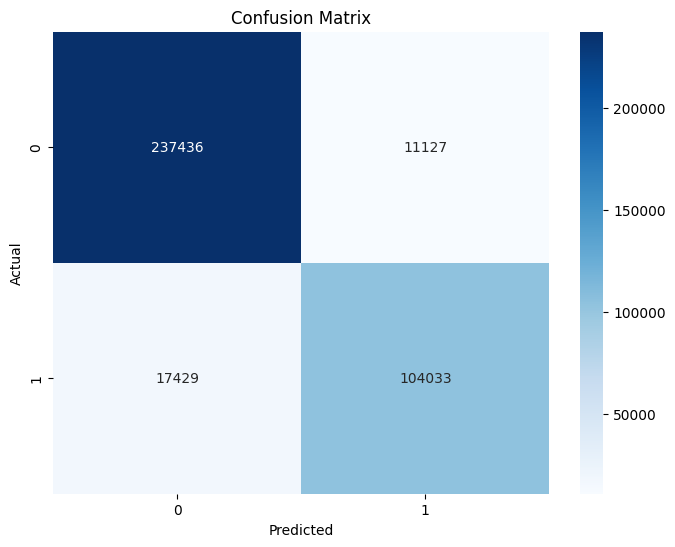

In [19]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Testing the Model with Custom Tweets

Let's create a function to make predictions on custom tweets and test it with some examples.

In [20]:
def predict_sentiment(tweet_text, model=lr_model, vectorizer=tfidf_vectorizer):
    """
    Predict the sentiment of a custom tweet using the trained model.
    
    Args:
        tweet_text (str): The raw text of the tweet to analyze
        model: The trained classification model
        vectorizer: The fitted TF-IDF vectorizer
    
    Returns:
        dict: Dictionary containing the original text, cleaned text, 
              prediction (0=negative, 1=positive), and confidence score
    """
    # Clean the tweet text using our preprocessing pipeline
    cleaned_tweet = text_cleaning_pipeline(tweet_text, rule="lemmatize")
    
    # Transform the cleaned text using the TF-IDF vectorizer
    tweet_vector = vectorizer.transform([cleaned_tweet])
    
    # Make a prediction
    prediction = model.predict(tweet_vector)[0]
    
    # Get the probability/confidence score
    proba = model.predict_proba(tweet_vector)[0]
    confidence = proba[prediction]
    
    # Return the results
    sentiment_label = "Positive" if prediction == 1 else "Negative"
    
    return {
        "original_text": tweet_text,
        "cleaned_text": cleaned_tweet,
        "prediction": sentiment_label,
        "confidence": confidence,
        "probabilities": {"Negative": proba[0], "Positive": proba[1]}
    }

# Test with some custom tweets
test_tweets = [
    "I love how President Trump is handling the economy! Great job! #MAGA",
    "Trump's policies are ruining our country and dividing people.",
    "Just heard Trump's speech today. Very impressive and presidential.",
    "Can't believe the media bias against Trump. So unfair!"
]

# Analyze each test tweet
print("Custom Tweet Sentiment Analysis:")
print("-" * 80)

for tweet in test_tweets:
    result = predict_sentiment(tweet)
    print(f"Original: {result['original_text']}")
    print(f"Cleaned: {result['cleaned_text']}")
    print(f"Prediction: {result['prediction']} (Confidence: {result['confidence']:.4f})")
    print(f"Probability Distribution: Negative: {result['probabilities']['Negative']:.4f}, Positive: {result['probabilities']['Positive']:.4f}")
    print("-" * 80)

Custom Tweet Sentiment Analysis:
--------------------------------------------------------------------------------
Original: I love how President Trump is handling the economy! Great job! #MAGA
Cleaned: love president trump handle economy great job
Prediction: Positive (Confidence: 0.9985)
Probability Distribution: Negative: 0.0015, Positive: 0.9985
--------------------------------------------------------------------------------
Original: Trump's policies are ruining our country and dividing people.
Cleaned: trump policies ruin country divide people
Prediction: Negative (Confidence: 0.9947)
Probability Distribution: Negative: 0.9947, Positive: 0.0053
--------------------------------------------------------------------------------
Original: Just heard Trump's speech today. Very impressive and presidential.
Cleaned: hear trump speech today impressive presidential
Prediction: Positive (Confidence: 0.6890)
Probability Distribution: Negative: 0.3110, Positive: 0.6890
------------------------